#Sampling from Permutations


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline 

1.Suppose we want to generate a uniformly distributed element in $S$, the set of all permutations of $(x_1, x_2, ..., x_n)$ of the numbers $(1,2,...n)$ for which $\sum_{j=1}^n jx_j> a$ for a given constant $a$.


Solution:

In [25]:
P= 2+2+0+0+4+5+5
print(P)

18


In [26]:
def Uniform_random_permutaion(n, a, N):
    List = []
    count = []
    for i in range(N):
        Permutation = list(range(1, n+1))
        random.shuffle(Permutation)
        s = sum([(j+1)*Permutation[j] for j in range(n)])
        if s > a:
            List.append(Permutation)
    unique, counts = np.unique(np.array(List), axis=0, return_counts=True)
    return unique.tolist(), counts.tolist()

$2$. [R] Start with n = 4 and a = p. List all the feasible permutations. Write a small python program to generate a uniformly random permutation just for this example. Run this program a 1000*p number of times and plot a histogram of frequencies of feasible permutations

Solution:

In [45]:
n=4
a=15
N=1000*P

Text(0.5, 0, 'Index of permutations')

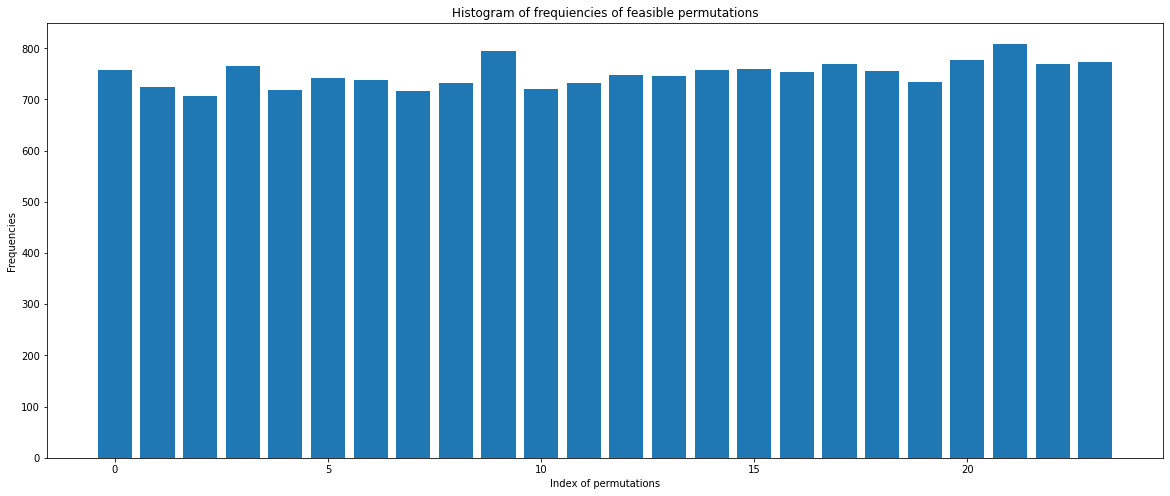

In [46]:
Feasible_Permutation_list,count = Uniform_random_permutaion(n,a,N)
plt.figure(figsize=(20,8))
plt.bar(list(range(len(Feasible_Permutation_list))),count)
plt.title('Histogram of frequiencies of feasible permutations')
plt.ylabel('Frequencies')
plt.xlabel("Index of permutations")

$3.$[R] Now, let us do the same exercise using MCMC. In the Markov chain modeling, the state space is given by all possible feasible permutations. We will first write a function that generates a (uniformly) random feasible neighbor of a given permutation. Two permutations in $S$ are said to be neighbors if one result from an interchange of two of the positions of the other, i.e., $(1, 2, 3, 4)$ and $(1, 2, 4, 3)$ are neighbors, but $(1, 2, 3, 4)$ and $(1, 3, 4, 2)$ are not. Now find feasible set of neighbors among all neighbors. Implement this function to generate (uniformly) random feasible neighbor of a given permutation. Each permutation is a state of the Markov chain. Note that this probability is denoted as $q(i, j)$, representing the probability of jumping to state $j$ from the current state $i$. $q(i, j) = 1/|N(i)|$, for $j \in N(i)$, the set of neighbors of $i$.

Solution:

In [28]:
def Random_Feasible_Neighbour(Permutation):
    n = len(Permutation)
    List = []
    for i in range(n):
        for j in range(i+1,n):
            new_permutation = Permutation.copy()
            new_permutation[i], new_permutation[j] = new_permutation[j], new_permutation[i]
            List.append(new_permutation)
    return np.array(List), List[np.random.randint(len(List))]

In [29]:
Random_Feasible_Neighbour([1,2,3,4])

(array([[2, 1, 3, 4],
        [3, 2, 1, 4],
        [4, 2, 3, 1],
        [1, 3, 2, 4],
        [1, 4, 3, 2],
        [1, 2, 4, 3]]), [1, 2, 4, 3])

In [30]:
print(len(Feasible_Permutation_list))

24


In [42]:
index = np.random.randint(0,24)
Permutation = Feasible_Permutation_list[index]
print("Given Permutation:", tuple(Permutation))
print("_________________________________________________________________________________________________________________________________________________________________________________________________________________")
Feasible_Neighbours, Uniformly_Chosen_Random_Feasible_Neaighbour = Random_Feasible_Neighbour(Permutation)
print('Feasible Neighbours of the Given Permutation:', [tuple(i) for i in Feasible_Neighbours],'\nUniformly Chosen Random Feasible Neaighbour:', tuple(Uniformly_Chosen_Random_Feasible_Neaighbour))

Given Permutation: (1, 2, 4, 3)
_________________________________________________________________________________________________________________________________________________________________________________________________________________
Feasible Neighbours of the Given Permutation: [(2, 1, 4, 3), (4, 2, 1, 3), (3, 2, 4, 1), (1, 4, 2, 3), (1, 3, 4, 2), (1, 2, 3, 4)] 
Uniformly Chosen Random Feasible Neaighbour: (1, 2, 3, 4)


In [33]:
def MCMC(n, a, N):
    List = []
    Feasible_Permutation_list, count = Uniform_random_permutaion(n, a, N)
    Perm = Feasible_Permutation_list[np.random.randint(len(Feasible_Permutation_list))]
    for i in range(N):
        fesible_permutaion_neighbour_List1, feasible_permurtaion_neighbour = Random_Feasible_Neighbour(Perm)
        p = 1/len(fesible_permutaion_neighbour_List1)
        Q = fesible_permutaion_neighbour_List1[np.random.randint(len(fesible_permutaion_neighbour_List1))]
        feasible_permutation_neighbour_List2, feasible_permuttion_neighbour2 = Random_Feasible_Neighbour(Perm)
        q = 1/len(feasible_permutation_neighbour_List2)
        alpha  = min(p/q, 1)
        accept = np.random.uniform()
        if accept < alpha:
            List.append(feasible_permurtaion_neighbour)
            Perm = feasible_permurtaion_neighbour
    List, count = np.unique(np.array(List), axis=0, return_counts=True)
    return List, count

$5$. [R] Write a program to generate the required permutations using the MCMC approach. Does it give reasonable
output? Experiment with your program and try several combinations of values of a = {int(p/2),p} and n =
${4}$. By choosing some trivial values Checking that your MCMC implementation is producing the expected
results

Solution:

[1 2 3 4]
[1 2 4 3]
[1 3 2 4]
[1 3 4 2]
[1 4 2 3]
[1 4 3 2]
[2 1 3 4]
[2 1 4 3]
[2 3 1 4]
[2 3 4 1]
[2 4 1 3]
[2 4 3 1]
[3 1 2 4]
[3 1 4 2]
[3 2 1 4]
[3 2 4 1]
[3 4 1 2]
[3 4 2 1]
[4 1 2 3]
[4 1 3 2]
[4 2 1 3]
[4 2 3 1]
[4 3 1 2]
[4 3 2 1]
[1 2 3 4]
[1 2 4 3]
[1 3 2 4]
[1 3 4 2]
[1 4 2 3]
[1 4 3 2]
[2 1 3 4]
[2 1 4 3]
[2 3 1 4]
[2 3 4 1]
[2 4 1 3]
[2 4 3 1]
[3 1 2 4]
[3 1 4 2]
[3 2 1 4]
[3 2 4 1]
[3 4 1 2]
[3 4 2 1]
[4 1 2 3]
[4 1 3 2]
[4 2 1 3]
[4 2 3 1]
[4 3 1 2]
[4 3 2 1]


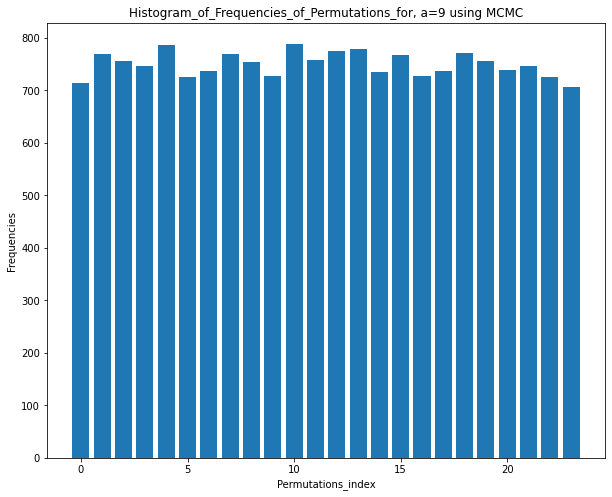

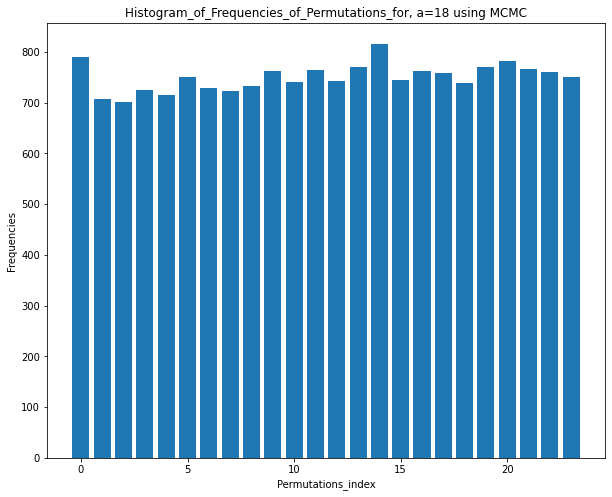

In [44]:
import matplotlib.pyplot as plt
n=4
a=[int(P/2),P]
N=1000*P
for k in a:
    Feasible_Permutation_list, count = MCMC(n, k, N)
    for perm in Feasible_Permutation_list:
        print(perm)
    plt.figure(figsize=(10,8))
    plt.bar(np.arange(len(Feasible_Permutation_list)), count)
    plt.title(f'Histogram_of_Frequencies_of_Permutations_for, a={k} using MCMC')
    plt.xlabel("Permutations_index")
    plt.ylabel('Frequencies')

yes this is reasonable output